<div class="alert alert-block alert-warning">

# Scaling Exercises

<div class="alert alert-block alert-success">

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

from env import get_connection
from wrangle import wrangle_zillow, acquire_zillow
import os

In [2]:
# Acquire and clean data
df = wrangle_zillow(acquire_zillow())

In [3]:
# Take a look
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
4,4,2,3633,296425,2005,6941.39,6037
6,3,4,1620,847770,2011,10244.94,6037
7,3,2,2077,646760,1926,7924.68,6037
11,0,0,1200,5328,1972,91.60,6037
14,0,0,171,6920,1973,255.17,6037


In [4]:
#split data
seed = 42
train, val_test = train_test_split(df, train_size=0.7, random_state=seed)
val, test = train_test_split(val_test, train_size=0.5, random_state=seed)

train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

<div class="alert alert-block alert-info">

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [33]:
to_scale = ['bedrooms','bathrooms','area','year_built','tax_value']

In [34]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

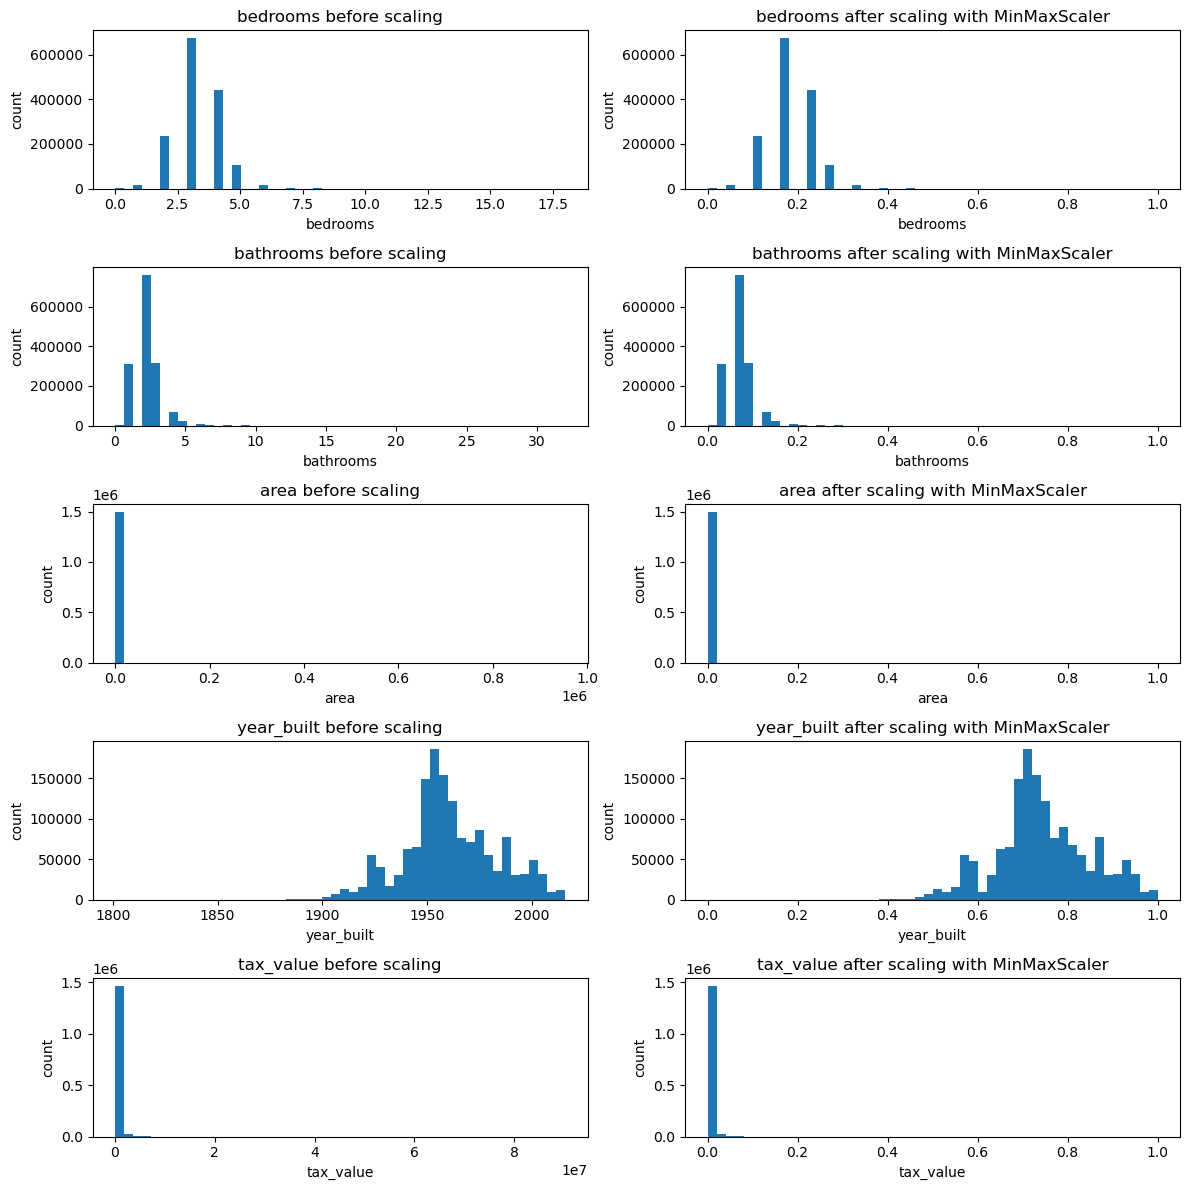

In [35]:
# call function with minmax
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=to_scale, bins=50)

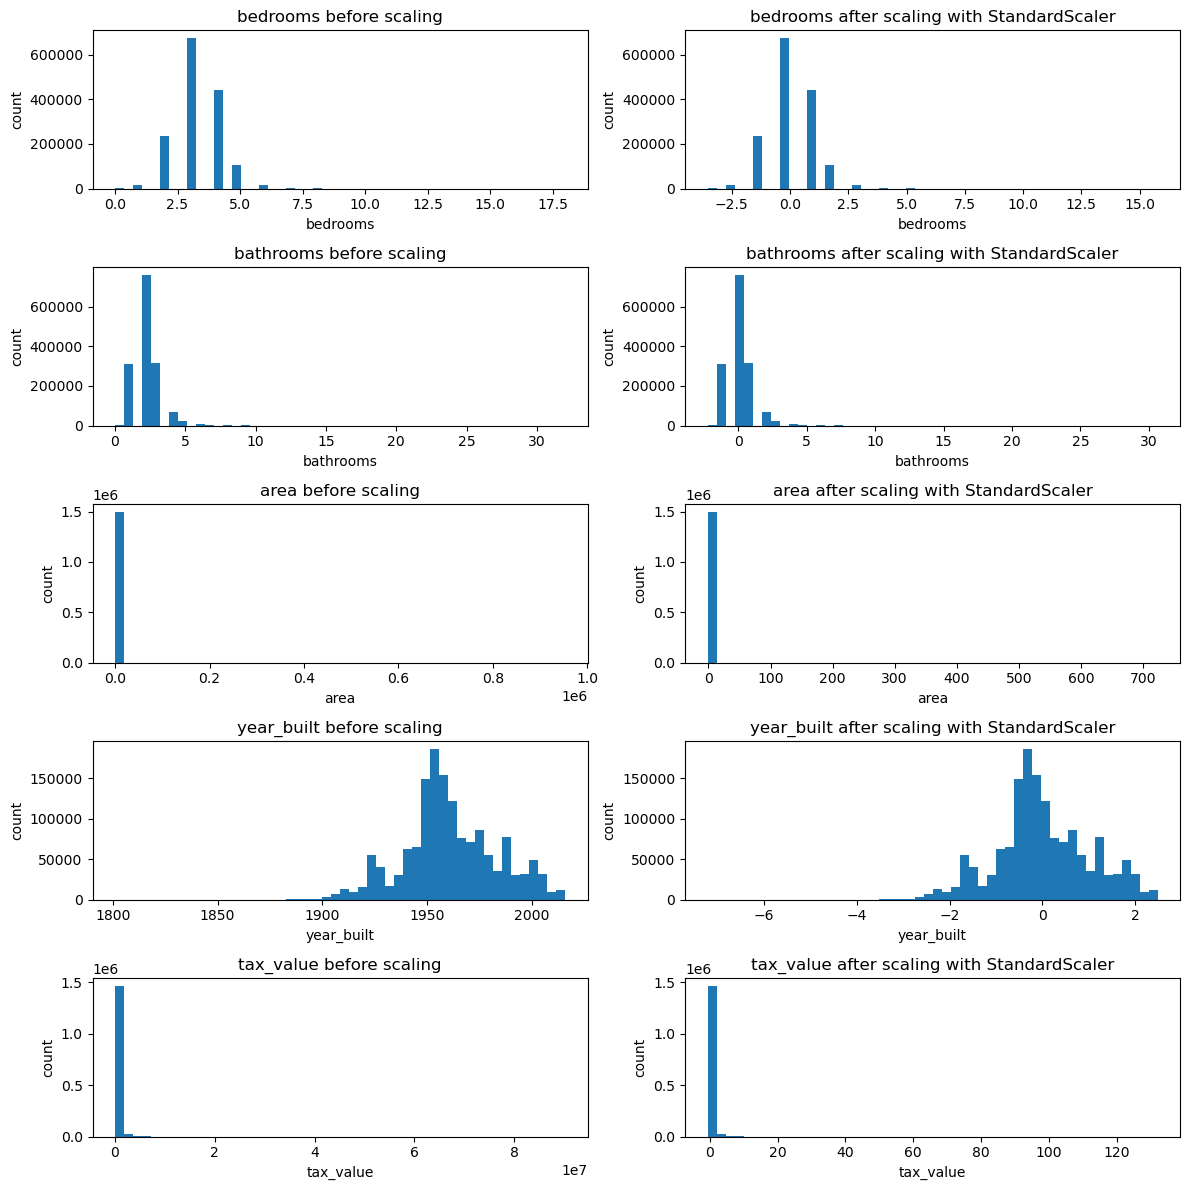

In [36]:
# call function with standard scaler
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=to_scale, bins=50)

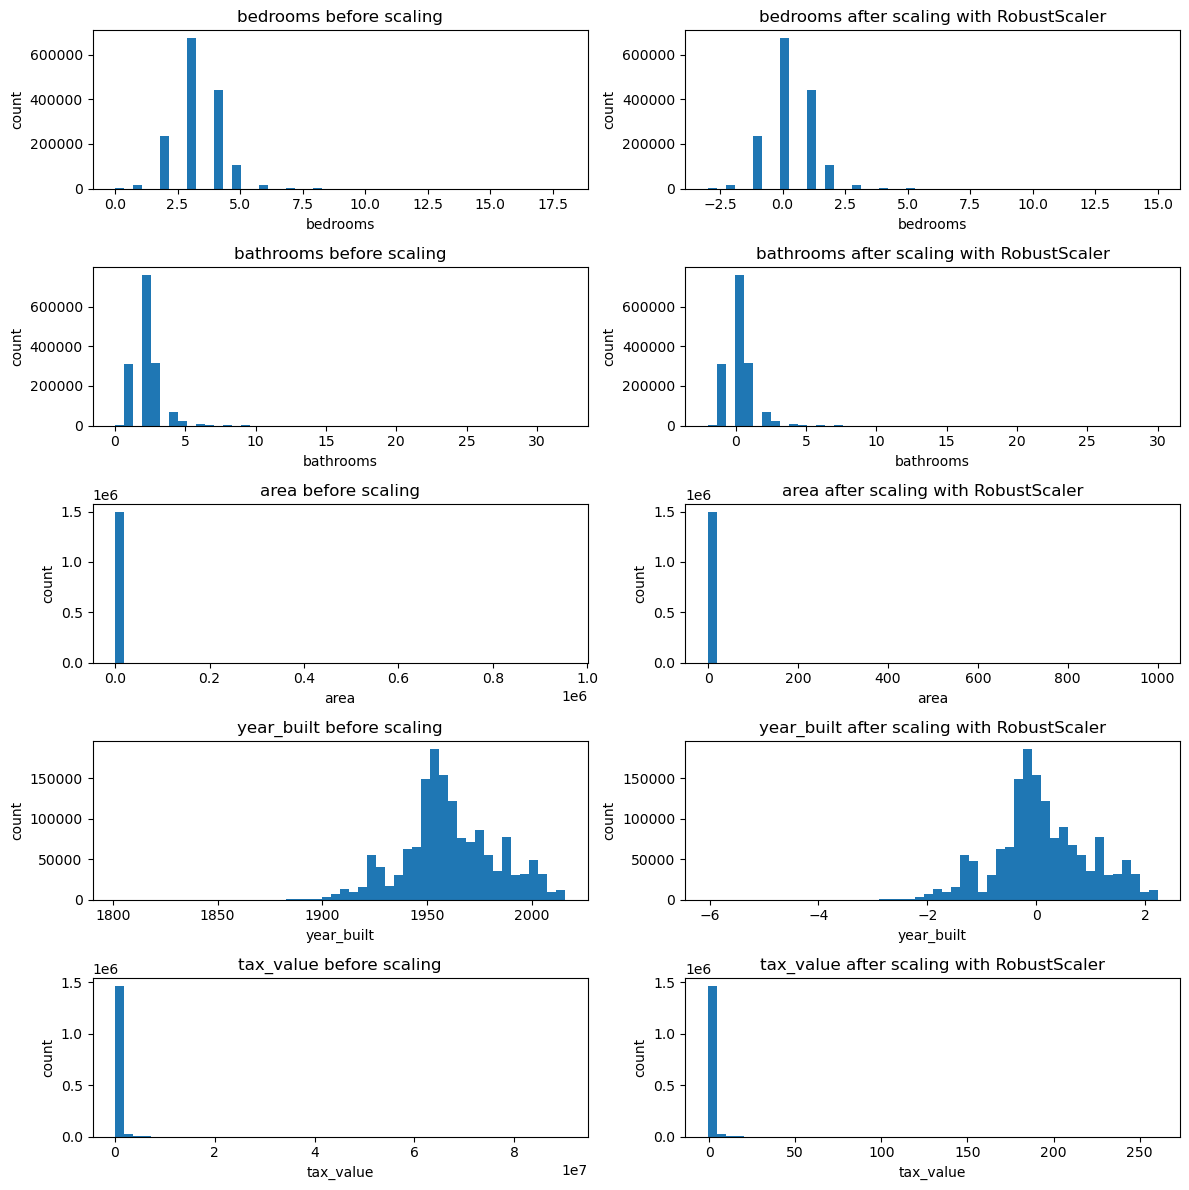

In [37]:
# call function with robustscaler
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=to_scale, bins=50)

<div class="alert alert-block alert-info">

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [10]:
#look at original data
train[to_scale].head()

,bedrooms,bathrooms,area,year_built,tax_value
1007466,3,2,1452,1980,241012
615622,3,2,1262,1953,235630
662507,3,1,1447,1947,435123
840040,3,2,1403,1965,268770
243798,3,2,1456,1961,365000


In [11]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

In [12]:
#look at scaled data
train_scaled.head()

,bedrooms,bathrooms,area,year_built,tax_value
0,0.166667,0.06250,0.001523,0.832558,0.002672
1,0.166667,0.06250,0.001324,0.706977,0.002612
2,0.166667,0.03125,0.001518,0.679070,0.004824
3,0.166667,0.06250,0.001472,0.762791,0.002980
4,0.166667,0.06250,0.001527,0.744186,0.004047


In [13]:
#appling the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled

array([[3.00000e+00, 2.00000e+00, 1.45200e+03, 1.98000e+03, 2.41012e+05],
       [3.00000e+00, 2.00000e+00, 1.26200e+03, 1.95300e+03, 2.35630e+05],
       [3.00000e+00, 1.00000e+00, 1.44700e+03, 1.94700e+03, 4.35123e+05],
       ...,
       [3.00000e+00, 3.00000e+00, 1.51700e+03, 1.94800e+03, 7.35768e+05],
       [2.00000e+00, 1.00000e+00, 1.39000e+03, 1.92200e+03, 7.88601e+05],
       [3.00000e+00, 2.00000e+00, 2.07000e+03, 1.97700e+03, 1.85523e+05]])

In [14]:
#converting 2d array to df and adding column names
inverted_train = pd.DataFrame(inverse_train_scaled, columns=to_scale)
inverted_train

,bedrooms,bathrooms,area,year_built,tax_value
0,3.0,2.0,1452.0,1980.0,241012.0
1,3.0,2.0,1262.0,1953.0,235630.0
2,3.0,1.0,1447.0,1947.0,435123.0
3,3.0,2.0,1403.0,1965.0,268770.0
4,3.0,2.0,1456.0,1961.0,365000.0
...,...,...,...,...,...
1498159,3.0,2.0,1281.0,1988.0,297096.0
1498160,4.0,2.0,1630.0,1949.0,179979.0
1498161,3.0,3.0,1517.0,1948.0,735768.0
1498162,2.0,1.0,1390.0,1922.0,788601.0


using the inverse_transform function on our scaled data will bring us back to our original data

<div class="alert alert-block alert-info">

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling. 

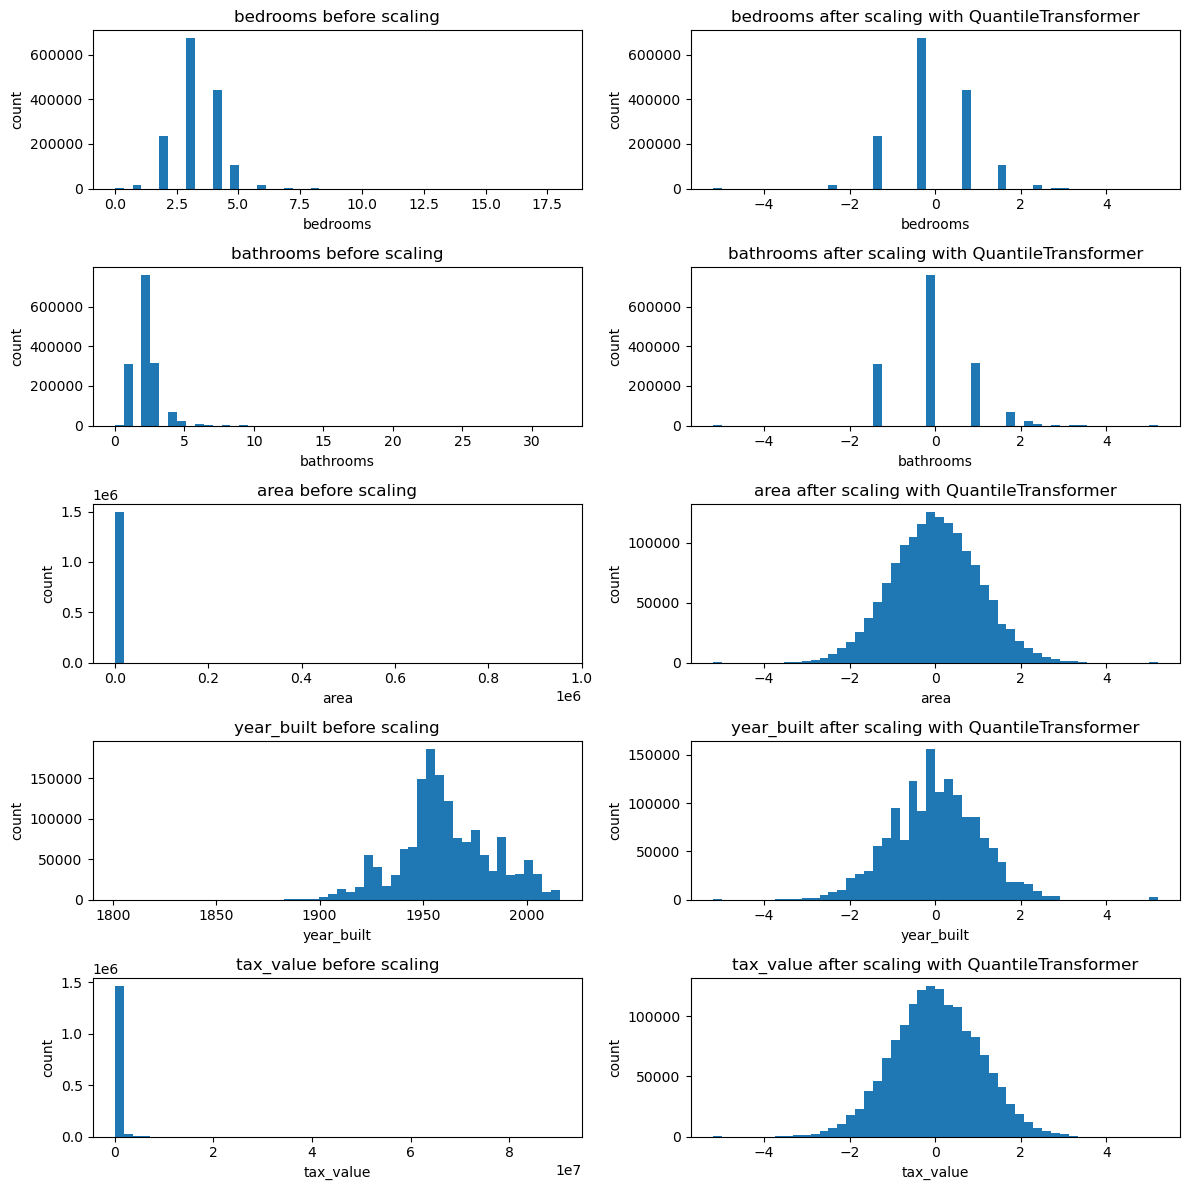

In [15]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=to_scale, bins=50) 

<div class="alert alert-block alert-info">

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice? 

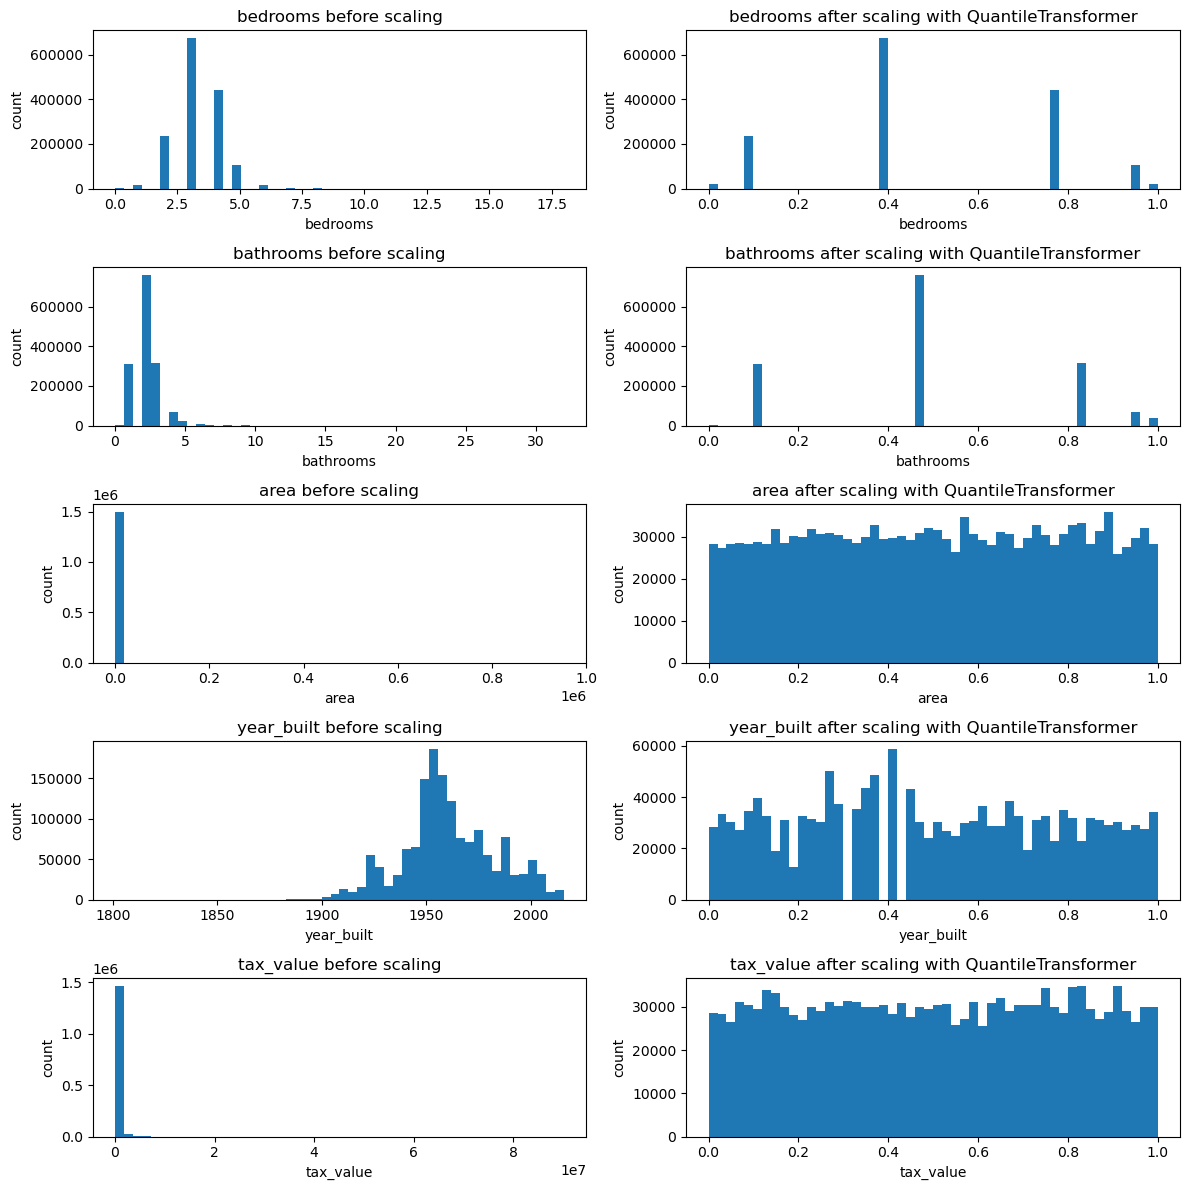

In [16]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=to_scale, bins=50)

<div class="alert alert-block alert-info">

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data! 

In [17]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1007466,3,2,1452,241012,1980,2974.81,6037
615622,3,2,1262,235630,1953,3029.22,6037
662507,3,1,1447,435123,1947,5226.67,6037
840040,3,2,1403,268770,1965,2849.62,6111
243798,3,2,1456,365000,1961,4582.48,6037


In [18]:
to_scale

['bedrooms', 'bathrooms', 'area', 'year_built', 'tax_value']

In [21]:
def scale_data(train, validate, test, to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = val.copy()
    test_scaled = test.copy()

    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [22]:
train_scaled, validate_scaled, test_scaled = scale_data(train, val, test, to_scale)